In [0]:
# Once we have cleaned data, we have approximately ~6.5Mil rows available.
# for the accelerated small scale models we need to strip the data down to N number of rows

# - Load Data from Processed csv filed into Dataframe
# - Param n_r : Draw n_r number of rows per N class (in this case the classes are ratings)
# - Param test_split_percentage : Specify a percentage of rows to be taken from drawn samples (eg. 5, 10, 30)
# - We can filter the decision to choose first n_r rows per class by limiting to those rows that have length under 50th or 25th percentile
# --> in essence pick smaller rows since there is ample class imbalance already

# Last recorded distribution
# 5.0-4.0    5,460,975
# 3.0        504,781
# 1.0-2.0    773,834

# DO NOT EDIT/ DELETE THIS BLOCK;


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# set working directory -> you must set the path into which you have uploaded the zipped file
# this is required in the case of colab or local 
%cd /content/drive/My\ Drive/SNLP\ Project
# %cd Source/repos/Sentiment-Analysis-using-Deep-Learning

/content/drive/My Drive/SNLP Project


In [3]:
# list content of drive - verify you are where you are supposed to be
%ls

 CleantData_Apr-03-2020_01-31.zip         ModelResults/
 Data_Balanced_20000_Apr-03-2020_06-52/  'Project Ideas.gdoc'
 Data_Balanced_2000_Apr-03-2020_06-46/   'Project Proposal.gdoc'
 Electronics_5.json.gz                   'Report MetaData'/
 Lexical_analysis/


In [0]:
import os
import gzip
import pandas as pd
import numpy as np
import matplotlib as mpl
import random

# Define Globals here 
ZipCSVFileName = 'CleantData_Apr-03-2020_01-31.zip'
N_R = 100000
test_split_percentage = 10

In [7]:
df = pd.read_csv(ZipCSVFileName)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6739590 entries, 0 to 6739589
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   overall         float64
 1   reviewTime      object 
 2   reviewerID      object 
 3   asin            object 
 4   reviewText      object 
 5   summary         object 
 6   unixReviewTime  int64  
 7   reviewText_len  int64  
 8   summary_len     int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 462.8+ MB


In [8]:

df_filtered = df.query('reviewText_len < 400 and summary_len < 35')
df_filtered = df_filtered.dropna()
df_filtered


,overall,reviewTime,reviewerID,asin,reviewText,summary,unixReviewTime,reviewText_len,summary_len
5,4.0,"06 5, 2013",A3IYSOTP3HA77N,0380709473,i read this probabl 50 year ago in my youth an...,abov averag mysteri,1370390400,149,21
6,5.0,"06 27, 2016",A11SXV34PZUQ5E,0380709473,i read everi perri mason book voraci find the ...,lam is cool,1466985600,182,12
7,5.0,"07 30, 2015",A2AUQM1HT2D5T8,0380709473,i love this seri of bertha and lamb great novel,five star,1438214400,54,10
8,5.0,"02 16, 2015",A3UD8JRWLX6SRX,0380709473,great read,five star,1424044800,11,10
17,5.0,"05 31, 2017",A7362LXMQEM6W,0511189877,work out of the box with my cabl box in northe...,paid full price,1496188800,128,15
...,...,...,...,...,...,...,...,...,...
6739583,2.0,"05 21, 2017",A12E1JGKV0ETAB,B01HJH42KU,i like the length and the product at first but...,lost abil to connect,1495324800,163,24
6739584,3.0,"06 26, 2017",A1HKXEX8BEQC2E,B01HJH40WU,not hold up over time emo_neg,not hold up over time emo_neg,1498435200,27,27
6739585,4.0,"03 21, 2017",A33MAQA919J2V8,B01HJH40WU,these seem like qualiti usb cabl time will tell,four star,1490054400,50,10
6739586,4.0,"01 9, 2017",A1AKHSCPD1BHM4,B01HJH40WU,work great love the longer cord as with ani co...,nice long cord,1483920000,152,14


In [9]:
df_filtered['reviewText_len'].describe().apply("{0:.3f}".format)

count    4122759.000
mean         113.646
std          101.532
min            1.000
25%           30.000
50%           83.000
75%          172.000
max          399.000
Name: reviewText_len, dtype: object

In [10]:
df_filtered['summary_len'].describe().apply("{0:.3f}".format)

count    4122759.000
mean          14.845
std            7.390
min            1.000
25%           10.000
50%           11.000
75%           19.000
max           34.000
Name: summary_len, dtype: object

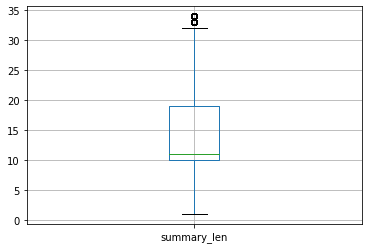

In [11]:
df_filtered.boxplot(column=['summary_len'])

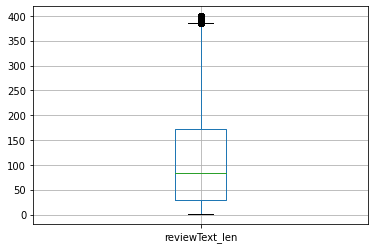

In [12]:
df_filtered.boxplot(column=['reviewText_len'])

In [13]:
df_result_train = pd.DataFrame(columns=['overall','reviewTime','reviewerID','asin','reviewText','summary','unixReviewTime','reviewText_len','summary_len'])
df_result_test = pd.DataFrame(columns=['overall','reviewTime','reviewerID','asin','reviewText','summary','unixReviewTime','reviewText_len','summary_len'])

np.random.seed(random.randint(12312, 182123))

# write code to create fragmented datasets for each class 
for i in [1,2,3,4,5]:

  # get elements of that class
  df_temp = df_filtered.query('overall == '+str(i))

  # get the partition 80%-20%, then keep N_R rows from 80% and N_R/10 from 20%
  msk = np.random.rand(len(df_temp)) < 0.8

  df_temp_train = df_temp[msk]
  df_temp_test = df_temp[~msk]

  # slice rows to append to result set 
  df_temp_train = df_temp_train.head(N_R)
  df_temp_test = df_temp_test.tail(N_R//10)

  df_result_train = df_result_train.append(df_temp_train, ignore_index = True)
  df_result_test = df_result_test.append(df_temp_test, ignore_index = True)

  print(i)



1
2
3
4
5


In [14]:
df_result_train.info()
df_result_train['overall'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         500000 non-null  float64
 1   reviewTime      500000 non-null  object 
 2   reviewerID      500000 non-null  object 
 3   asin            500000 non-null  object 
 4   reviewText      500000 non-null  object 
 5   summary         500000 non-null  object 
 6   unixReviewTime  500000 non-null  object 
 7   reviewText_len  500000 non-null  object 
 8   summary_len     500000 non-null  object 
dtypes: float64(1), object(8)
memory usage: 34.3+ MB


3.0    100000
5.0    100000
4.0    100000
2.0    100000
1.0    100000
Name: overall, dtype: int64

In [15]:
df_result_test.info()
df_result_test['overall'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         50000 non-null  float64
 1   reviewTime      50000 non-null  object 
 2   reviewerID      50000 non-null  object 
 3   asin            50000 non-null  object 
 4   reviewText      50000 non-null  object 
 5   summary         50000 non-null  object 
 6   unixReviewTime  50000 non-null  object 
 7   reviewText_len  50000 non-null  object 
 8   summary_len     50000 non-null  object 
dtypes: float64(1), object(8)
memory usage: 3.4+ MB


3.0    10000
5.0    10000
4.0    10000
2.0    10000
1.0    10000
Name: overall, dtype: int64

In [16]:
# test if any empty Summaries

bool2 = pd.isnull(df_result_test['summary'])
df_result_test[bool2]

,overall,reviewTime,reviewerID,asin,reviewText,summary,unixReviewTime,reviewText_len,summary_len


In [17]:
# save these 2 files to a folder 
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()

# Apr-02-2020_22-31-25
dt_string = str(N_R)+'_'+now.strftime("%b-%d-%Y_%H-%M")
folder_string = 'Data_Balanced_'+dt_string

print(folder_string)

# stupid shell way of converting variable to string 
!mkdir "$folder_string"

compression_opts_train = dict(method='zip', archive_name='Train_'+dt_string+'.csv')
df_result_train.to_csv(folder_string+'/Train_'+dt_string+'.zip', index=False, compression=compression_opts_train) 

compression_opts_test = dict(method='zip', archive_name='Test_'+dt_string+'.csv')
df_result_test.to_csv(folder_string+'/Test_'+dt_string+'.zip', index=False, compression=compression_opts_test) 

Data_Balanced_100000_Apr-04-2020_06-54
